In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import cv2
import os
import numpy as np
import re

In [ ]:
file_paths = [
    r"DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv",
    r"DDW_B18_1200_NIC_FINAL_STATE_ARUNACHAL_PRADESH-2011.csv",
    r"DDW_B18_1400_NIC_FINAL_STATE_MANIPUR-2011.csv",
    r"DDW_B18_1500_NIC_FINAL_STATE_MIZORAM-2011.csv",
    r"DDW_B18_1900_NIC_FINAL_STATE_WEST_BENGAL-2011.csv",
    r"DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-2011.csv",
    r"DDW_B18sc_1600_NIC_FINAL_STATE_TRIPURA-2011.csv",
    r"DDW_B18sc_2000_NIC_FINAL_STATE_JHARKHAND-2011.csv",
    r"DDW_B18sc_2400_NIC_FINAL_STATE_GUJARAT-2011.csv",
    r"DDW_B18sc_2700_NIC_FINAL_STATE_MAHARASHTRA-2011.csv",
    r"DDW_B18sc_2900_NIC_FINAL_STATE_KARNATAKA-2011.csv",
    r"DDW_B18sc_3000_NIC_FINAL_STATE_GOA-2011.csv",
    r"DDW_B18sc_3200_NIC_FINAL_STATE_KERALA-2011.csv",
    r"DDW_B18sc_3300_NIC_FINAL_STATE_TAMIL_NADU-2011.csv",
    r"DDW_B18sc_3400_NIC_FINAL_STATE_PUDUCHERRY-2011.csv",
    r"DDW_B18st_0200_NIC_FINAL_STATE_HIMACHAL_PRADESH-2011.csv",
    r"DDW_B18st_0500_NIC_FINAL_STATE_UTTARAKHAND-2011.csv",
    r"DDW_B18st_0900_NIC_FINAL_STATE_UTTAR_PRADESH-2011.csv",
    r"DDW_B18st_1000_NIC_FINAL_STATE_BIHAR-2011.csv",
    r"DDW_B18st_1100_NIC_FINAL_STATE_SIKKIM-2011.csv",
    r"DDW_B18st_1300_NIC_FINAL_STATE_NAGALAND-2011.csv",
    r"DDW_B18st_1800_NIC_FINAL_STATE_ASSAM-2011.csv",
    r"DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv"
]

df_list = [pd.read_csv(file_path, encoding='latin1') for file_path in file_paths]

df = pd.concat(df_list, ignore_index=True)

In [ ]:
df.shape

(195145, 25)

In [ ]:
df.to_csv("all_of_comined.csv",index =False)

In [ ]:
# remove unnec comma, semi colon,
df['State Code'] = df['State Code'].astype(str).str.replace('`', '').astype(int)
df['District Code'] = df['District Code'].astype(str).str.replace('`', '').astype(int)
df['Division'] = df['Division'].astype(str).str.replace('`', '').astype(int)
df['Group'] = df['Group'].astype(str).str.replace('`', '').astype(int)
df['Class'] = df['Class'].astype(str).str.replace('`', '').astype(int)

In [ ]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [ ]:
# remove spl char

def remove_sp_char(column_name):
    return ''.join(e for e in column_name if e.isalnum() or e in ('_', '.'))

df.columns = [remove_sp_char(col) for col in df.columns]

In [ ]:
df.columns

Index(['StateCode', 'DistrictCode', 'IndiaStates', 'Division', 'Group',
       'Class', 'NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales'],
      dtype='object')

In [ ]:
df.head(3)

,StateCode,DistrictCode,IndiaStates,Division,Group,Class,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,...,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
0,8,0,STATE - RAJASTHAN,0,0,0,Total,9017944,7594737,1423207,...,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490
1,8,0,STATE - RAJASTHAN,1,0,0,"Crop and animal production, hunting and relate...",450766,201572,249194,...,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882
2,8,0,STATE - RAJASTHAN,1,11,0,Growing of non-perennial crops,12876,10547,2329,...,1013,9562,4051,5511,8147,3295,4852,1415,756,659


EDA (Exploriation Data Analysis )

In [ ]:
non_numeric_columns =df.select_dtypes(exclude=[float, int]).columns

# Drop non-numeric columns from the DataFrame
numeric_df = df.drop(columns=non_numeric_columns)

# Calculate correlation
correlation_matrix = numeric_df.corr()
correlation_matrix

,StateCode,DistrictCode,Division,Group,Class,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,...,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
StateCode,1.000000,0.851207,-0.010642,-0.001695,0.003277,-0.003645,-0.004775,0.001599,-0.004710,-0.005690,...,0.003503,-0.005332,-0.003995,-0.006299,-0.007676,-0.006013,-0.008593,0.000114,-0.000294,0.000589
DistrictCode,0.851207,1.000000,-0.005517,-0.005349,-0.004001,-0.028298,-0.027999,-0.027503,-0.028544,-0.028156,...,-0.026093,-0.027705,-0.027672,-0.026415,-0.028375,-0.028293,-0.027010,-0.024065,-0.025354,-0.021301
Division,-0.010642,-0.005517,1.000000,0.744991,0.438274,-0.010332,-0.010797,-0.007516,-0.013753,-0.013073,...,0.000091,-0.011351,-0.011699,-0.010492,-0.014724,-0.014173,-0.014414,-0.003224,-0.006859,0.001242
Group,-0.001695,-0.005349,0.744991,1.000000,0.593097,-0.014413,-0.014439,-0.013226,-0.016427,-0.015752,...,-0.008444,-0.014618,-0.015023,-0.013552,-0.016540,-0.016435,-0.015789,-0.009337,-0.011886,-0.005841
Class,0.003277,-0.004001,0.438274,0.593097,1.000000,-0.011074,-0.010969,-0.010713,-0.012066,-0.011600,...,-0.008203,-0.010986,-0.011278,-0.010196,-0.011908,-0.011956,-0.011270,-0.008139,-0.009593,-0.005999
MainWorkersTotalPersons,-0.003645,-0.028298,-0.010332,-0.014413,-0.011074,1.000000,0.996935,0.938961,0.982750,0.981071,...,0.926007,0.931390,0.962609,0.858475,0.904754,0.942542,0.829537,0.914343,0.954722,0.819452
MainWorkersTotalMales,-0.004775,-0.027999,-0.010797,-0.014439,-0.010969,0.996935,1.000000,0.909170,0.978081,0.983617,...,0.899947,0.917952,0.960615,0.835229,0.891626,0.941126,0.807887,0.901310,0.951808,0.795125
MainWorkersTotalFemales,0.001599,-0.027503,-0.007516,-0.013226,-0.010713,0.938961,0.909170,1.000000,0.930049,0.896767,...,0.971606,0.921079,0.899647,0.896725,0.895065,0.878534,0.862926,0.903520,0.896394,0.865368
MainWorkersRuralPersons,-0.004710,-0.028544,-0.013753,-0.016427,-0.012066,0.982750,0.978081,0.930049,1.000000,0.994983,...,0.882093,0.944638,0.967549,0.878677,0.937471,0.968126,0.866199,0.884830,0.923402,0.793600
MainWorkersRuralMales,-0.005690,-0.028156,-0.013073,-0.015752,-0.011600,0.981071,0.983617,0.896767,0.994983,1.000000,...,0.860010,0.928626,0.968135,0.848275,0.919353,0.968428,0.834551,0.874606,0.924458,0.770562


In [ ]:
df.shape

(195145, 25)

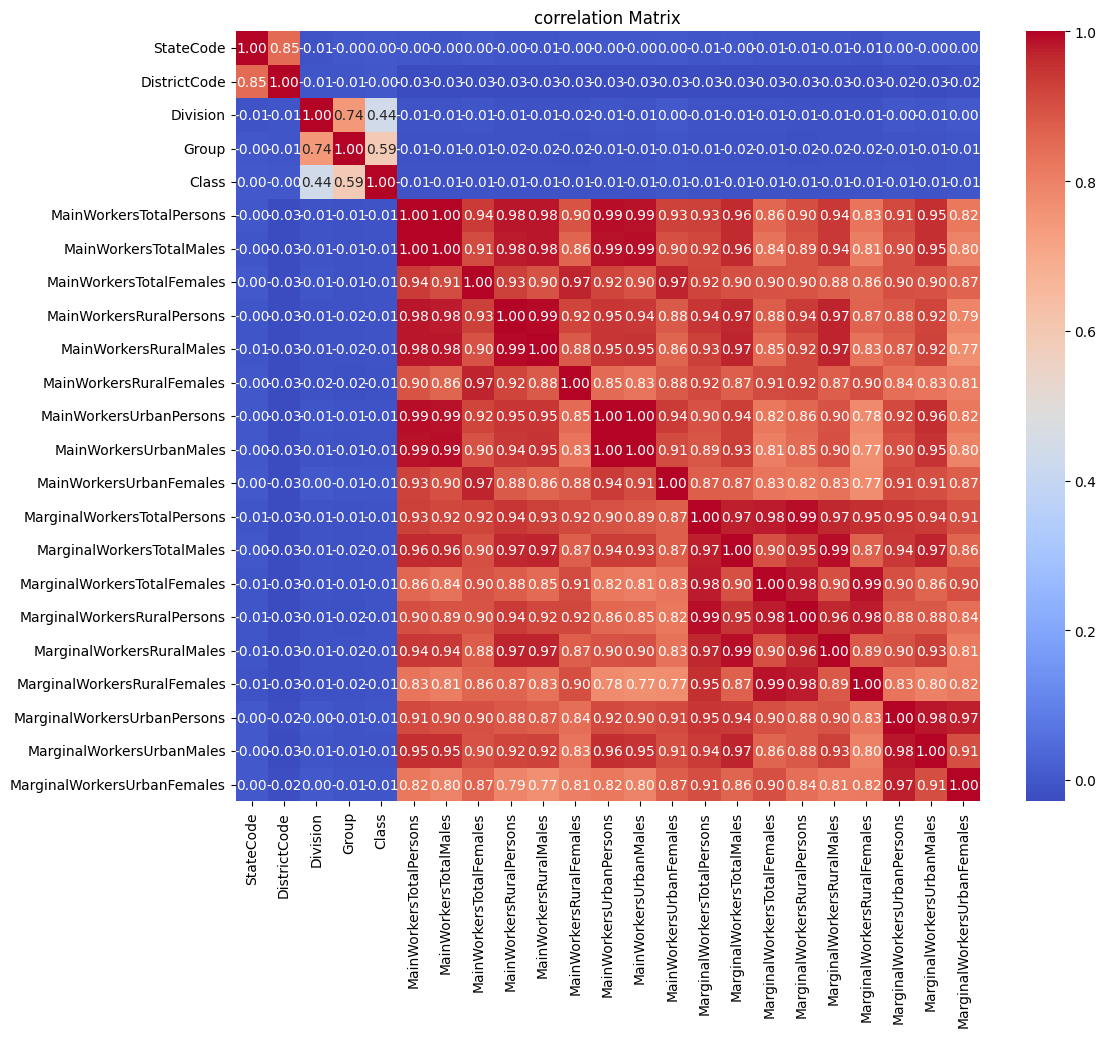

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def correlation_matrix():
    numberic_df = df.select_dtypes(include=['float64','int64'])

    plt.figure(figsize=(12,10))
    sns.heatmap(numberic_df.corr(), annot=True,cmap='coolwarm', fmt='.2f')
    plt.title('correlation Matrix')
    plt.show()

correlation_matrix()

In [ ]:
df.head()

,StateCode,DistrictCode,IndiaStates,Division,Group,Class,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,...,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
0,8,0,STATE - RAJASTHAN,0,0,0,Total,9017944,7594737,1423207,...,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490
1,8,0,STATE - RAJASTHAN,1,0,0,"Crop and animal production, hunting and relate...",450766,201572,249194,...,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882
2,8,0,STATE - RAJASTHAN,1,11,0,Growing of non-perennial crops,12876,10547,2329,...,1013,9562,4051,5511,8147,3295,4852,1415,756,659
3,8,0,STATE - RAJASTHAN,1,11,111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,942,9085,3883,5202,7777,3161,4616,1308,722,586
4,8,0,STATE - RAJASTHAN,1,11,112,Growing of rice,79,71,8,...,2,13,4,9,11,2,9,2,2,0


In [ ]:
df.isna().sum()

StateCode                      0
DistrictCode                   0
IndiaStates                    0
Division                       0
Group                          0
Class                          0
NICName                        0
MainWorkersTotalPersons        0
MainWorkersTotalMales          0
MainWorkersTotalFemales        0
MainWorkersRuralPersons        0
MainWorkersRuralMales          0
MainWorkersRuralFemales        0
MainWorkersUrbanPersons        0
MainWorkersUrbanMales          0
MainWorkersUrbanFemales        0
MarginalWorkersTotalPersons    0
MarginalWorkersTotalMales      0
MarginalWorkersTotalFemales    0
MarginalWorkersRuralPersons    0
MarginalWorkersRuralMales      0
MarginalWorkersRuralFemales    0
MarginalWorkersUrbanPersons    0
MarginalWorkersUrbanMales      0
MarginalWorkersUrbanFemales    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StateCode,195145.0,19.178278,9.057612,2.0,10.0,19.0,27.0,34.0
DistrictCode,195145.0,332.223377,196.176206,0.0,153.0,332.0,516.0,637.0
Division,195145.0,46.590351,28.800311,0.0,23.0,46.0,70.0,99.0
Group,195145.0,389.422404,313.186034,0.0,103.0,370.0,631.0,992.0
Class,195145.0,2293.804709,3059.131669,0.0,0.0,113.0,4659.0,9920.0
MainWorkersTotalPersons,195145.0,1492.137518,45681.690979,0.0,6.0,28.0,188.0,15619759.0
MainWorkersTotalMales,195145.0,1193.171150,37739.170774,0.0,6.0,23.0,145.0,12801403.0
MainWorkersTotalFemales,195145.0,298.966369,8582.018644,0.0,0.0,3.0,24.0,2818356.0
MainWorkersRuralPersons,195145.0,660.618719,20444.364940,0.0,2.0,12.0,74.0,6770444.0
MainWorkersRuralMales,195145.0,517.035312,16542.946109,0.0,1.0,8.0,56.0,5446541.0


In [ ]:
df.nunique()

StateCode                        23
DistrictCode                    472
IndiaStates                     491
Division                         89
Group                           241
Class                           423
NICName                         587
MainWorkersTotalPersons        8679
MainWorkersTotalMales          7811
MainWorkersTotalFemales        3970
MainWorkersRuralPersons        5767
MainWorkersRuralMales          5218
MainWorkersRuralFemales        2694
MainWorkersUrbanPersons        6561
MainWorkersUrbanMales          5934
MainWorkersUrbanFemales        2929
MarginalWorkersTotalPersons    4208
MarginalWorkersTotalMales      3181
MarginalWorkersTotalFemales    2850
MarginalWorkersRuralPersons    3406
MarginalWorkersRuralMales      2535
MarginalWorkersRuralFemales    2379
MarginalWorkersUrbanPersons    2421
MarginalWorkersUrbanMales      1951
MarginalWorkersUrbanFemales    1557
dtype: int64

In [ ]:
df.head()

,StateCode,DistrictCode,IndiaStates,Division,Group,Class,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,...,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
0,8,0,STATE - RAJASTHAN,0,0,0,Total,9017944,7594737,1423207,...,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490
1,8,0,STATE - RAJASTHAN,1,0,0,"Crop and animal production, hunting and relate...",450766,201572,249194,...,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882
2,8,0,STATE - RAJASTHAN,1,11,0,Growing of non-perennial crops,12876,10547,2329,...,1013,9562,4051,5511,8147,3295,4852,1415,756,659
3,8,0,STATE - RAJASTHAN,1,11,111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,942,9085,3883,5202,7777,3161,4616,1308,722,586
4,8,0,STATE - RAJASTHAN,1,11,112,Growing of rice,79,71,8,...,2,13,4,9,11,2,9,2,2,0


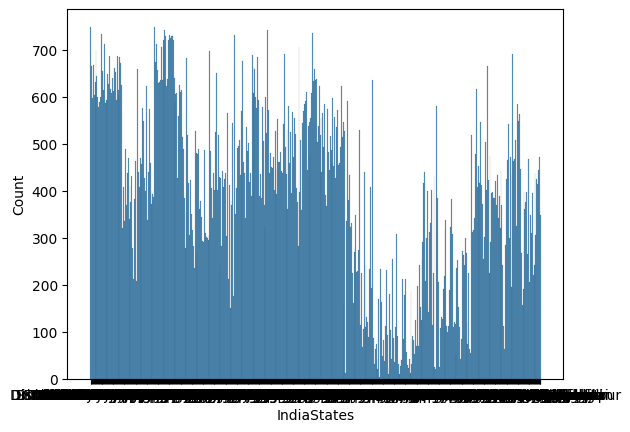

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x = 'IndiaStates', data = df, )
plt.show()

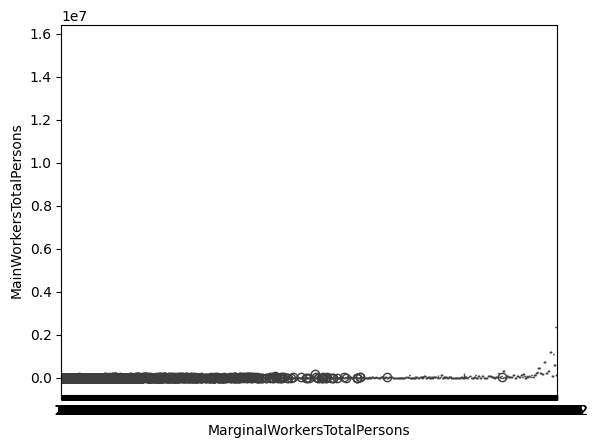

In [ ]:
x_var = "MarginalWorkersTotalPersons"
y_var = "MainWorkersTotalPersons"
sns.boxplot(x = x_var, y = y_var, data = df)
plt.show()

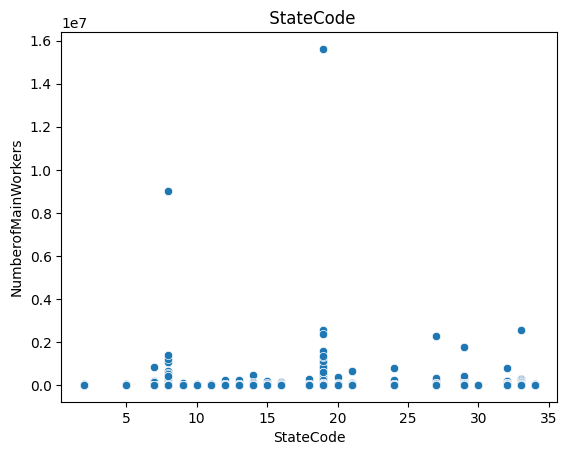

In [ ]:
y_var = "MainWorkersTotalPersons".strip()
sns.scatterplot(x = 'StateCode', y = y_var, data = df)
plt.xlabel('StateCode')
plt.ylabel('NumberofMainWorkers')
plt.title(' StateCode')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


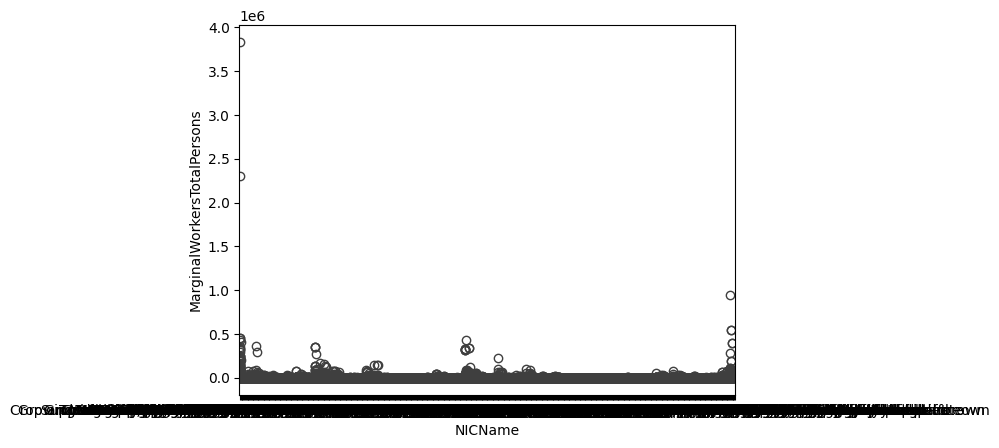

In [ ]:
sns.boxplot( x = "NICName", y = 'MarginalWorkersTotalPersons', data = df)
plt.show()

Datas Cleaning Procesures

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
195140    False
195141    False
195142    False
195143    False
195144    False
Length: 195145, dtype: bool

In [ ]:
df.dtypes

StateCode                       int64
DistrictCode                    int64
IndiaStates                    object
Division                        int64
Group                           int64
Class                           int64
NICName                        object
MainWorkersTotalPersons         int64
MainWorkersTotalMales           int64
MainWorkersTotalFemales         int64
MainWorkersRuralPersons         int64
MainWorkersRuralMales           int64
MainWorkersRuralFemales         int64
MainWorkersUrbanPersons         int64
MainWorkersUrbanMales           int64
MainWorkersUrbanFemales         int64
MarginalWorkersTotalPersons     int64
MarginalWorkersTotalMales       int64
MarginalWorkersTotalFemales     int64
MarginalWorkersRuralPersons     int64
MarginalWorkersRuralMales       int64
MarginalWorkersRuralFemales     int64
MarginalWorkersUrbanPersons     int64
MarginalWorkersUrbanMales       int64
MarginalWorkersUrbanFemales     int64
dtype: object

In [ ]:
# Drop un nec cols
columns_to_drop = ["StateCode", "DistrictCode", "Division", "Group", "Class"]
df = df.drop(columns=columns_to_drop)

In [ ]:
df.columns

Index(['IndiaStates', 'NICName', 'MainWorkersTotalPersons',
       'MainWorkersTotalMales', 'MainWorkersTotalFemales',
       'MainWorkersRuralPersons', 'MainWorkersRuralMales',
       'MainWorkersRuralFemales', 'MainWorkersUrbanPersons',
       'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
       'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales',
       'MarginalWorkersTotalFemales', 'MarginalWorkersRuralPersons',
       'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
       'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales',
       'MarginalWorkersUrbanFemales'],
      dtype='object')

In [ ]:
# Extract 'State' and 'District' from 'India/States' column
df[['State', 'District']] = df['IndiaStates'].str.extract(r'STATE - (\w+)|District - (\w+)', expand=True)
df = df.drop('IndiaStates', axis=1)

In [ ]:
df[['State', 'District']].isnull().sum()

State       180430
District     14715
dtype: int64

In [ ]:
# Fill NaN values in 'State' column with forward fill (ffill)
df['State'] = df['State'].ffill()
df['District'] = df['District'].bfill()

In [ ]:
df[['State', 'District']].isnull().sum()

State       0
District    0
dtype: int64

In [ ]:
# Example: Creating a new 'TotalWorkers' column by summing 'MainWorkersTotalPersons' and 'MarginalWorkersTotalPersons'
df['TotalWorkers'] = df['MainWorkersTotalPersons'] + df['MarginalWorkersTotalPersons']
df['MaleFemaleRatio'] = df['MainWorkersTotalMales'] / (df['MainWorkersTotalFemales'].replace(0, 1))

In [ ]:
df[['TotalWorkers', 'MaleFemaleRatio']].isnull().sum()

TotalWorkers       0
MaleFemaleRatio    0
dtype: int64

In [ ]:
df['TotalPopulation'] = df['MainWorkersTotalPersons'] + df['MarginalWorkersTotalPersons']
df['WorkersRatio'] = df['TotalWorkers'] / df['TotalPopulation']

In [ ]:
df[['TotalPopulation', 'WorkersRatio']].isnull().sum()

TotalPopulation    0
WorkersRatio       0
dtype: int64

In [ ]:
df[['TotalPopulation', 'WorkersRatio']] = df[['TotalPopulation', 'WorkersRatio']].astype(int)

In [ ]:
# # download cleaned df
df.to_csv("HRM.csv", index = False)

In [ ]:
# Replace 'file_path' with the path to your CSV file
file_path = r'/content/poptable.csv'

df_geo = pd.read_csv(file_path)

In [ ]:
df_geo.nunique()

Unnamed: 0    33
State.Name    33
latitude      33
longitude     32
dtype: int64

In [ ]:
# Drop the specified columns
df_geo = df_geo.drop(['Unnamed: 0', 'State.Name'], axis=1)

In [ ]:
# Concatenate the two DataFrames horizontally (along columns) based on their index
df_1 = pd.concat([df, df_geo[['latitude', 'longitude']]], axis=1)

In [ ]:
df_1.head()

,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,...,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales,State,District,TotalWorkers,MaleFemaleRatio,TotalPopulation,WorkersRatio,latitude,longitude
0,Total,9017944,7594737,1423207,4469555,3664793,804762,4548389,3929944,618445,...,297432,184490,RAJASTHAN,Ganganagar,11325696,5.336354,11325696,1,11.667026,92.735983
1,"Crop and animal production, hunting and relate...",450766,201572,249194,391263,161879,229384,59503,39693,19810,...,4982,12882,RAJASTHAN,Ganganagar,859494,0.808896,859494,1,14.750429,78.570026
2,Growing of non-perennial crops,12876,10547,2329,5644,4328,1316,7232,6219,1013,...,756,659,RAJASTHAN,Ganganagar,22438,4.528553,22438,1,27.100399,93.616601
3,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,5195,3987,1208,6866,5924,942,...,722,586,RAJASTHAN,Ganganagar,21146,4.609767,21146,1,26.749981,94.216667
4,Growing of rice,79,71,8,48,42,6,31,29,2,...,2,0,RAJASTHAN,Ganganagar,92,8.875000,92,1,25.785414,87.479973


In [ ]:
df_1.columns

Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation',
       'WorkersRatio', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
df_1[['latitude', 'longitude', ]].isnull().sum()

latitude     195112
longitude    195112
dtype: int64

In [ ]:
df_1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
195140    False
195141    False
195142     True
195143    False
195144     True
Length: 195145, dtype: bool

In [ ]:
df_1.columns

Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation',
       'WorkersRatio', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
# Calculate the mean of the 'Latitude' and 'Longitude' columns
mean_latitude = df_1['latitude'].mean()
mean_longitude = df_1['longitude'].mean()

# Fill the missing values with their respective mean values
df_1.loc[:, 'latitude'] = df_1['latitude'].fillna(mean_latitude)
df_1.loc[:, 'longitude'] = df_1['longitude'].fillna(mean_longitude)

In [ ]:
df_1[['latitude', 'longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

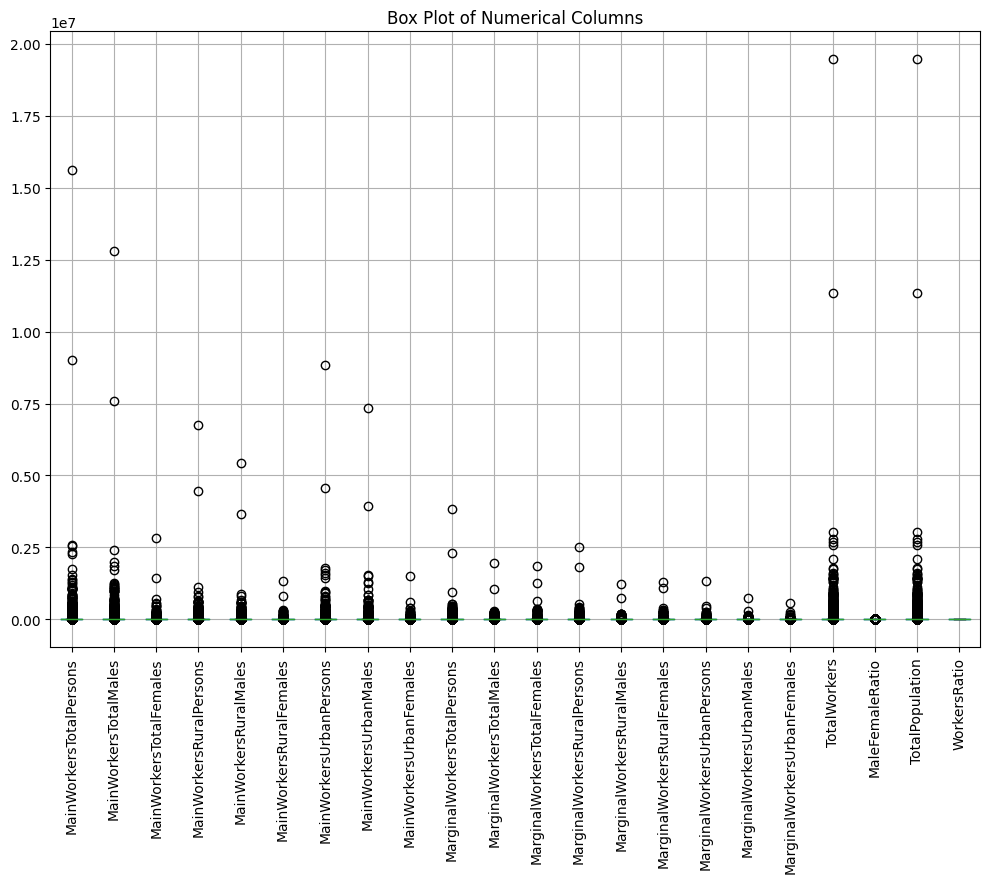

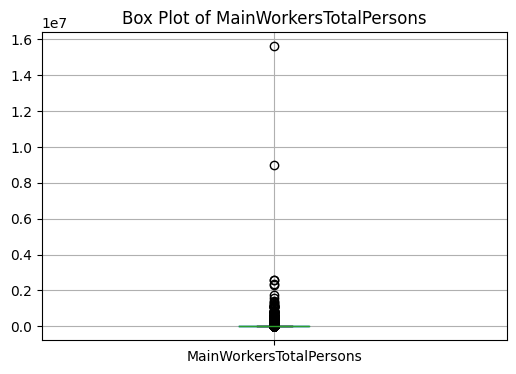

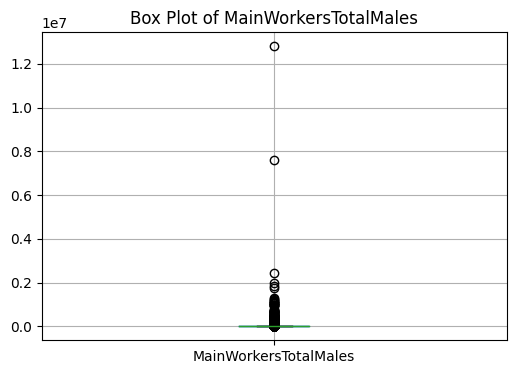

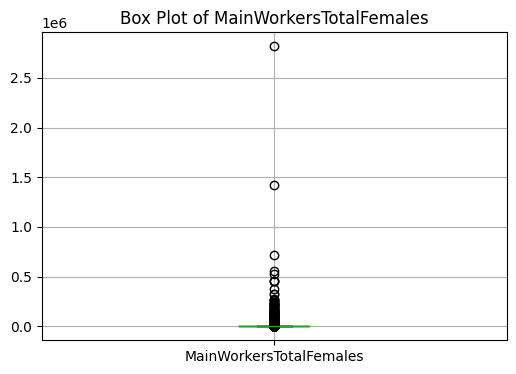

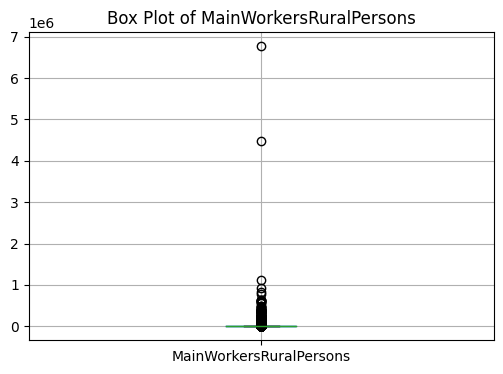

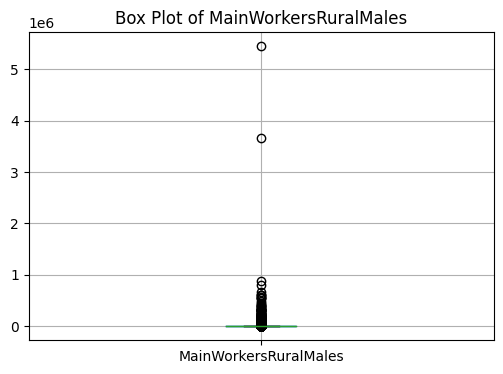

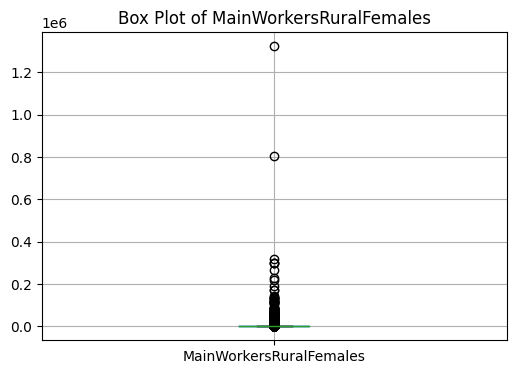

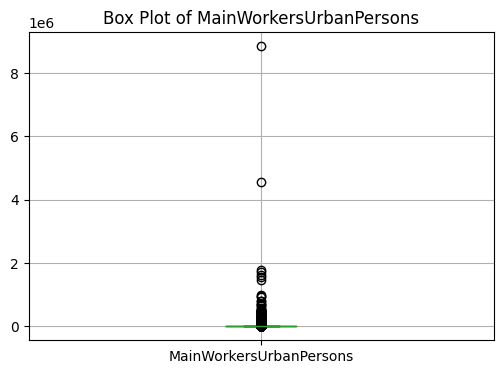

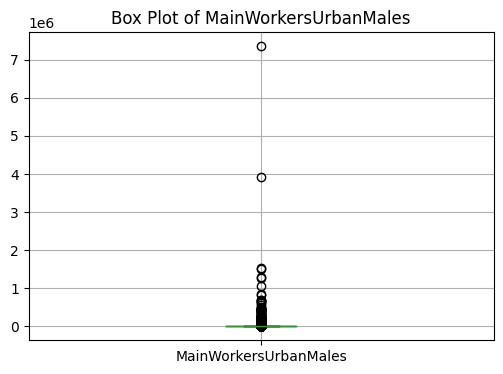

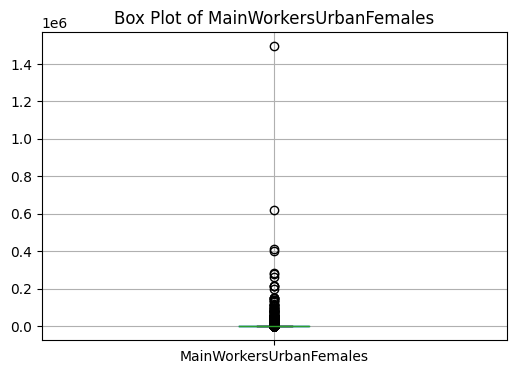

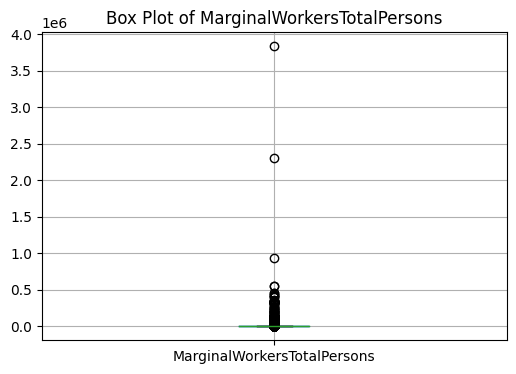

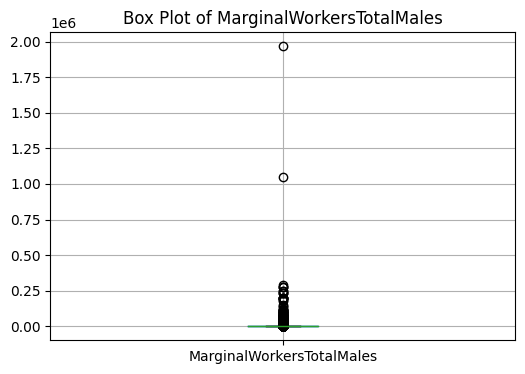

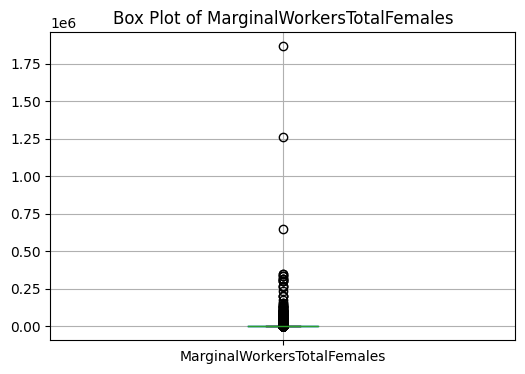

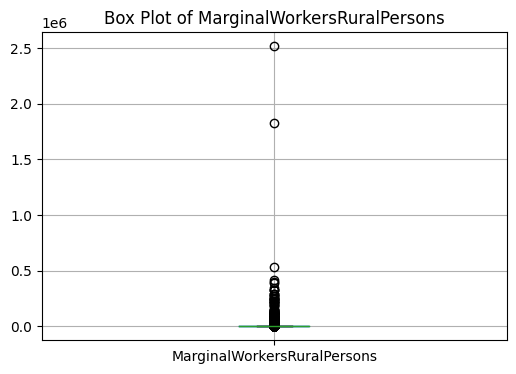

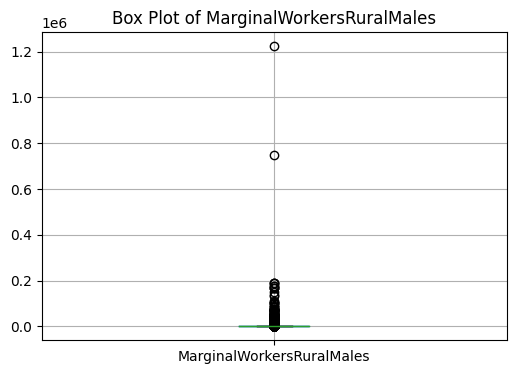

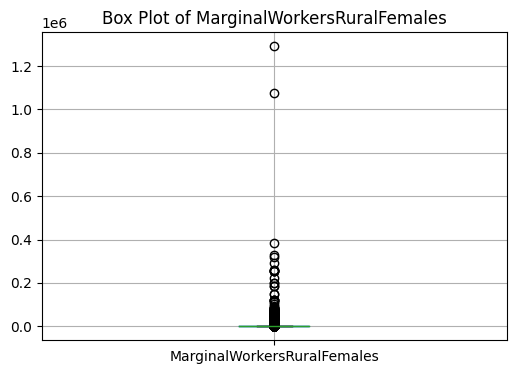

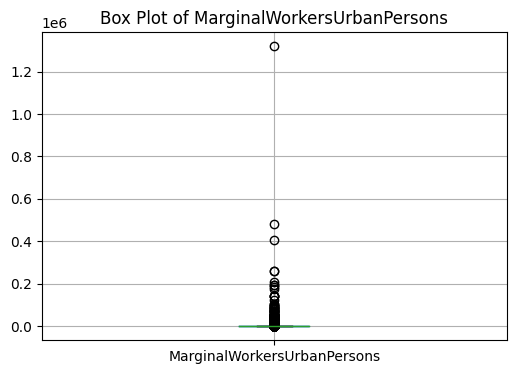

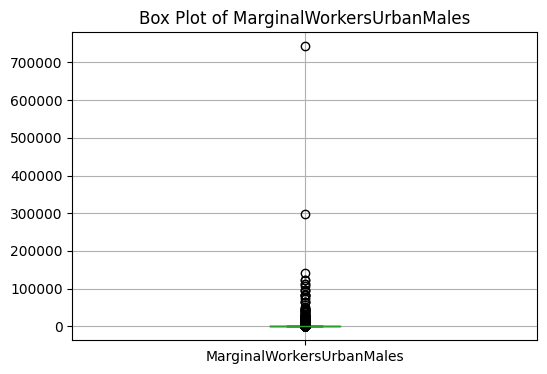

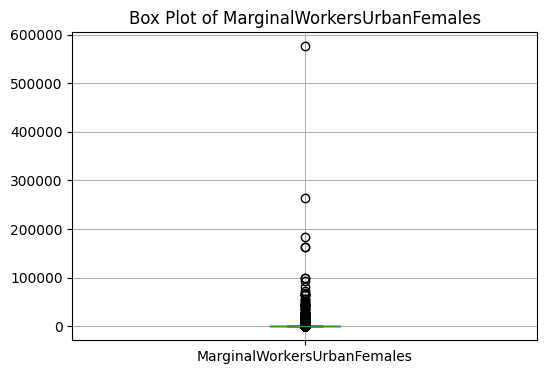

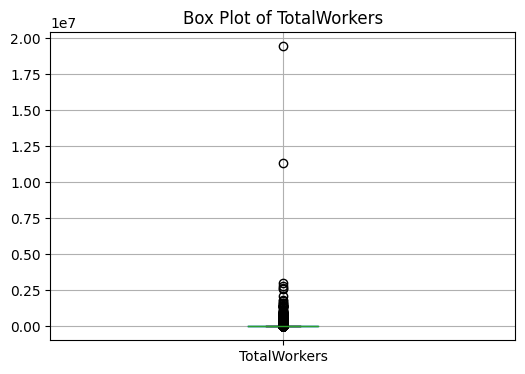

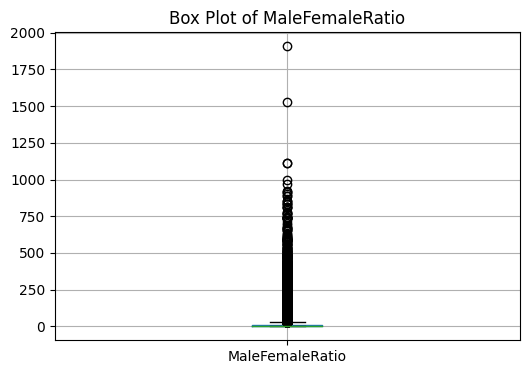

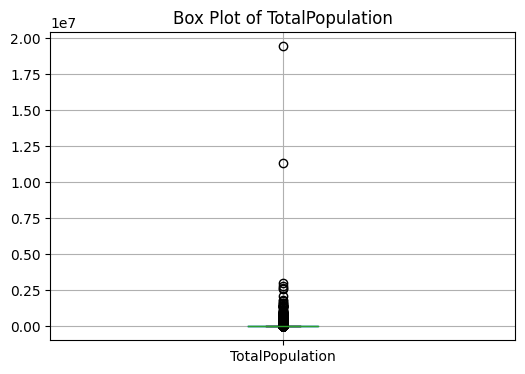

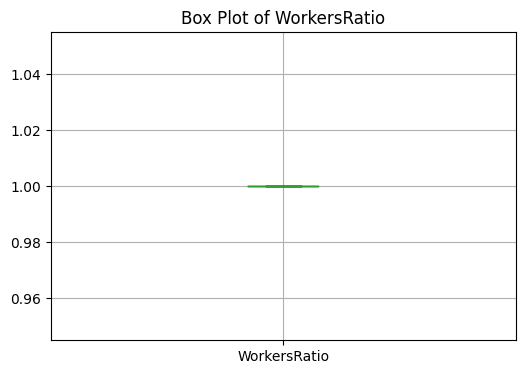

In [ ]:
# Select only the numerical columns for outlier detection
numerical_columns = ['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales',
                     'MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales',
                     'MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
                     'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
                     'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
                     'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales',
                     'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation', 'WorkersRatio']

# Calculate outliers using Z-score
z_scores =df_1[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Set a threshold for Z-score (e.g., 3) to identify outliers
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Plot Box Plots to visualize the distribution and outliers
plt.figure(figsize=(12, 8))
df_1[numerical_columns].boxplot()
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=90)
plt.show()

# Plot Box Plots separately for each numerical column to focus on individual distributions
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    df_1[[column]].boxplot()
    plt.title(f"Box Plot of {column}")
    plt.show()

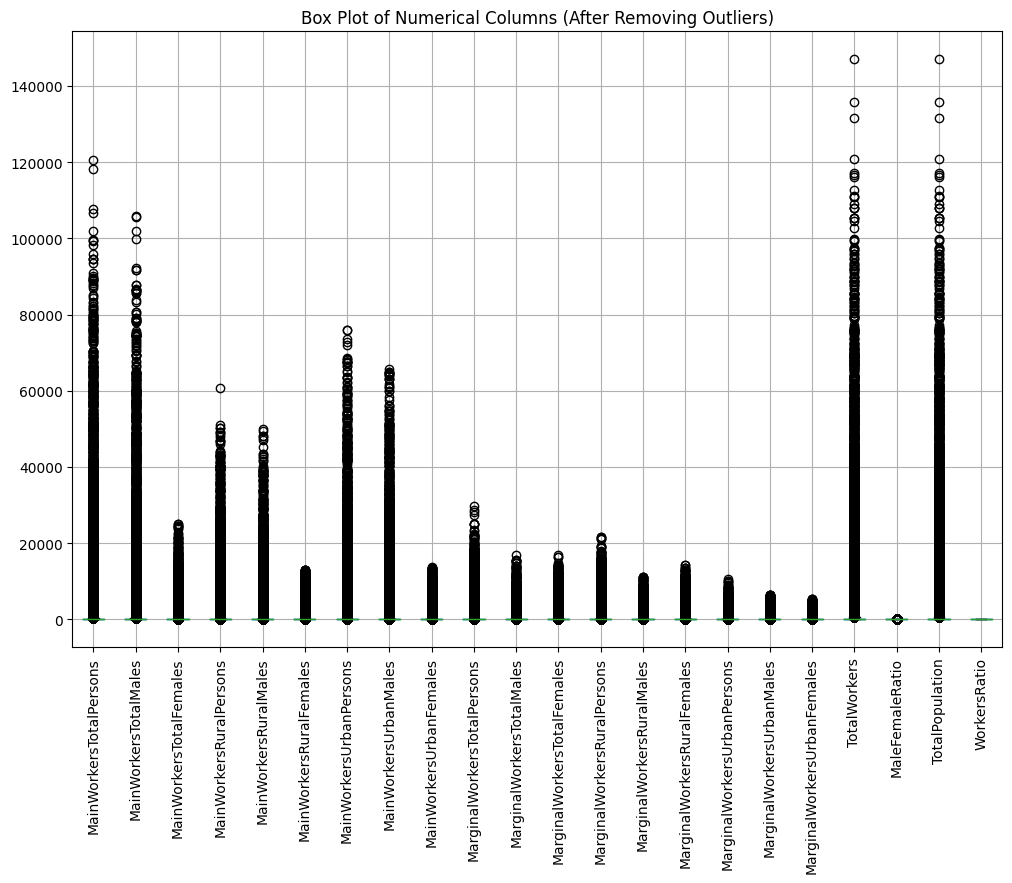

In [ ]:
# Remove outliers

# Select only the numerical columns for outlier detection
numerical_columns = ['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales',
                     'MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales',
                     'MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
                     'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
                     'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
                     'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales',
                     'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation', 'WorkersRatio']

# Calculate Z-scores for each numerical column
z_scores = df_1[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Set a threshold for Z-score (e.g., 3) to identify outliers
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove rows with outliers in any numerical column
df_1_no_outliers = df_1[~outliers.any(axis=1)]

# Visualize the distribution of cleaned data with Box Plots
plt.figure(figsize=(12, 8))
df_1_no_outliers = df_1[~outliers.any(axis=1)]
df_1_no_outliers[numerical_columns].boxplot()  # Removed the square brackets here
plt.title("Box Plot of Numerical Columns (After Removing Outliers)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_1.shape

(195145, 27)

In [ ]:
df_1['District']

0         Ganganagar
1         Ganganagar
2         Ganganagar
3         Ganganagar
4         Ganganagar
             ...    
195140    Malkangiri
195141    Malkangiri
195142    Malkangiri
195143    Malkangiri
195144    Malkangiri
Name: District, Length: 195145, dtype: object

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NICName                      195145 non-null  object 
 1   MainWorkersTotalPersons      195145 non-null  int64  
 2   MainWorkersTotalMales        195145 non-null  int64  
 3   MainWorkersTotalFemales      195145 non-null  int64  
 4   MainWorkersRuralPersons      195145 non-null  int64  
 5   MainWorkersRuralMales        195145 non-null  int64  
 6   MainWorkersRuralFemales      195145 non-null  int64  
 7   MainWorkersUrbanPersons      195145 non-null  int64  
 8   MainWorkersUrbanMales        195145 non-null  int64  
 9   MainWorkersUrbanFemales      195145 non-null  int64  
 10  MarginalWorkersTotalPersons  195145 non-null  int64  
 11  MarginalWorkersTotalMales    195145 non-null  int64  
 12  MarginalWorkersTotalFemales  195145 non-null  int64  
 13 

In [ ]:
df_1.nunique()

NICName                          587
MainWorkersTotalPersons         8679
MainWorkersTotalMales           7811
MainWorkersTotalFemales         3970
MainWorkersRuralPersons         5767
MainWorkersRuralMales           5218
MainWorkersRuralFemales         2694
MainWorkersUrbanPersons         6561
MainWorkersUrbanMales           5934
MainWorkersUrbanFemales         2929
MarginalWorkersTotalPersons     4208
MarginalWorkersTotalMales       3181
MarginalWorkersTotalFemales     2850
MarginalWorkersRuralPersons     3406
MarginalWorkersRuralMales       2535
MarginalWorkersRuralFemales     2379
MarginalWorkersUrbanPersons     2421
MarginalWorkersUrbanMales       1951
MarginalWorkersUrbanFemales     1557
State                             23
District                         440
TotalWorkers                    9451
MaleFemaleRatio                29974
TotalPopulation                 9451
WorkersRatio                       1
latitude                          34
longitude                         33
d

In [ ]:
df_1.to_csv("newdf.csv", index = False)

In [ ]:
# new df_1
df_2 = pd.read_csv("/content/newdf.csv")
df_2.head(2)

,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,...,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales,State,District,TotalWorkers,MaleFemaleRatio,TotalPopulation,WorkersRatio,latitude,longitude
0,Total,9017944,7594737,1423207,4469555,3664793,804762,4548389,3929944,618445,...,297432,184490,RAJASTHAN,Ganganagar,11325696,5.336354,11325696,1,11.667026,92.735983
1,"Crop and animal production, hunting and relate...",450766,201572,249194,391263,161879,229384,59503,39693,19810,...,4982,12882,RAJASTHAN,Ganganagar,859494,0.808896,859494,1,14.750429,78.570026


In [ ]:
df_2.columns.tolist()

['NICName',
 'MainWorkersTotalPersons',
 'MainWorkersTotalMales',
 'MainWorkersTotalFemales',
 'MainWorkersRuralPersons',
 'MainWorkersRuralMales',
 'MainWorkersRuralFemales',
 'MainWorkersUrbanPersons',
 'MainWorkersUrbanMales',
 'MainWorkersUrbanFemales',
 'MarginalWorkersTotalPersons',
 'MarginalWorkersTotalMales',
 'MarginalWorkersTotalFemales',
 'MarginalWorkersRuralPersons',
 'MarginalWorkersRuralMales',
 'MarginalWorkersRuralFemales',
 'MarginalWorkersUrbanPersons',
 'MarginalWorkersUrbanMales',
 'MarginalWorkersUrbanFemales',
 'State',
 'District',
 'TotalWorkers',
 'MaleFemaleRatio',
 'TotalPopulation',
 'WorkersRatio',
 'latitude',
 'longitude']

In [ ]:
df_2['NICName'].unique()

array(['Total',
       'Crop and animal production, hunting and related service activities',
       'Growing of non-perennial crops',
       'Growing of cereals (except rice), leguminous crops and oil seeds',
       'Growing of rice',
       'Growing of vegetables and melons, roots and tubers',
       'Growing of sugar cane', 'Growing of fibre crops',
       'Growing of other non-perennial crop',
       'Growing of perennial crops',
       'Growing of tropical and subtropical fruits',
       'Growing of citrus fruits',
       'Growing of pome fruits and stone fruits',
       'Growing of other tree and bush fruits and nuts',
       'Growing of oleaginous fruits', 'Growing of beverage crops',
       'Growing of spices, aromatic, drug and pharmaceutical crops',
       'Growing of other perennial crops', 'Plant propagation',
       'Animal production', 'Raising of cattle and buffaloes',
       'Raising of horses and other equines',
       'Raising and breeding of camels and camelids',
    

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_2.dtypes

NICName                         object
MainWorkersTotalPersons          int64
MainWorkersTotalMales            int64
MainWorkersTotalFemales          int64
MainWorkersRuralPersons          int64
MainWorkersRuralMales            int64
MainWorkersRuralFemales          int64
MainWorkersUrbanPersons          int64
MainWorkersUrbanMales            int64
MainWorkersUrbanFemales          int64
MarginalWorkersTotalPersons      int64
MarginalWorkersTotalMales        int64
MarginalWorkersTotalFemales      int64
MarginalWorkersRuralPersons      int64
MarginalWorkersRuralMales        int64
MarginalWorkersRuralFemales      int64
MarginalWorkersUrbanPersons      int64
MarginalWorkersUrbanMales        int64
MarginalWorkersUrbanFemales      int64
State                           object
District                        object
TotalWorkers                     int64
MaleFemaleRatio                float64
TotalPopulation                  int64
WorkersRatio                     int64
latitude                 

In [ ]:
df_2['NICName'] = df_2['NICName'].astype(str)
def clean_and_tokenize(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Apply the function to your textual data
df_2['NICName'] = df_2['NICName'].apply(clean_and_tokenize)

In [ ]:
from gensim.models import Word2Vec

# Assuming 'cleaned_tokens' is the column containing tokenized text
sentences = df_2['NICName'].tolist()

# Train Word2Vec model
model = Word2Vec(df_2['NICName'], vector_size=100, window=5, min_count=1, workers=4)

# Save the Word2Vec model
model.save("word2vec_model")

# You can use the trained Word2Vec model to get word vectors
word_to_check = 'uranium'
word_vector = model.wv[word_to_check]

In [ ]:
word_vector

array([-0.02671424,  0.04102592, -0.05749313, -0.02109247, -0.02370925,
       -0.1355084 , -0.02992148,  0.11381312, -0.16420692,  0.03012584,
        0.01529803, -0.08904959, -0.00656656,  0.10564231,  0.00289804,
       -0.04807041,  0.05334748, -0.07745592, -0.07383104, -0.07725937,
        0.04501095, -0.03665898,  0.04044364, -0.02460512,  0.02524985,
        0.05785789, -0.03007177, -0.00984858, -0.02103804,  0.09892863,
        0.08832927,  0.03138709, -0.03843356, -0.11129966, -0.03216521,
        0.04711519,  0.00081903,  0.00250415,  0.03977948, -0.15222116,
       -0.02355526, -0.11363941, -0.00450508,  0.01429247,  0.02817169,
        0.01059536, -0.06531835,  0.06617999,  0.02491549,  0.01202898,
        0.02723164, -0.04597809,  0.00637654, -0.04140322,  0.00302054,
        0.00135342, -0.01835193,  0.08094111,  0.02476507,  0.07969368,
        0.09186634, -0.08802431,  0.014353  , -0.08361199, -0.04981381,
       -0.03451622,  0.077072  ,  0.05739667, -0.0885707 ,  0.07

In [ ]:
print(model)

Word2Vec<vocab=707, vector_size=100, alpha=0.025>


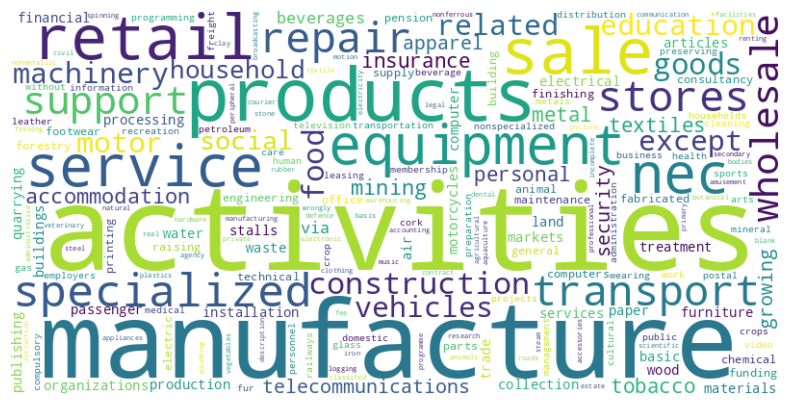

In [ ]:
# Calculate word frequencies
all_tokens = [token for tokens_list in df_2['NICName'] for token in tokens_list]
freq_dist = FreqDist(all_tokens)

# Visualize word frequencies using a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

# Create a sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Convert the list to a string
df_2['NICName_str'] = df_2['NICName'].apply(lambda x: ' '.join(map(str, x)))

# Apply sentiment analysis to the new string column
df_2['sentiment_score'] = df_2['NICName_str'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Assuming you have already trained and saved the Word2Vec model
# Load the Word2Vec model
loaded_model = Word2Vec.load("word2vec_model")

# Check if 'workers' is in the vocabulary
word_to_check = 'grapes'

word_vector = loaded_model.wv[word_to_check]

# # Get the vocabulary of the model
vocabulary = loaded_model.wv.key_to_index

# # Print the vocabulary
print("Vocabulary:", vocabulary)

Vocabulary: {'activities': 0, 'manufacture': 1, 'products': 2, 'sale': 3, 'retail': 4, 'service': 5, 'nec': 6, 'equipment': 7, 'specialized': 8, 'stores': 9, 'repair': 10, 'transport': 11, 'support': 12, 'wholesale': 13, 'construction': 14, 'goods': 15, 'food': 16, 'related': 17, 'motor': 18, 'machinery': 19, 'except': 20, 'vehicles': 21, 'education': 22, 'social': 23, 'household': 24, 'accommodation': 25, 'mining': 26, 'insurance': 27, 'tobacco': 28, 'metal': 29, 'textiles': 30, 'personal': 31, 'telecommunications': 32, 'apparel': 33, 'growing': 34, 'security': 35, 'beverages': 36, 'via': 37, 'organizations': 38, 'trade': 39, 'water': 40, 'services': 41, 'articles': 42, 'production': 43, 'collection': 44, 'processing': 45, 'wood': 46, 'markets': 47, 'stalls': 48, 'treatment': 49, 'quarrying': 50, 'materials': 51, 'motorcycles': 52, 'land': 53, 'furniture': 54, 'installation': 55, 'electrical': 56, 'buildings': 57, 'waste': 58, 'financial': 59, 'publishing': 60, 'air': 61, 'passenger':

In [ ]:
# Get the vocabulary of the Word2Vec model
vocabulary = loaded_model.wv.key_to_index

# Print the first 10 words in the vocabulary
print(list(vocabulary.keys())[:10])

['activities', 'manufacture', 'products', 'sale', 'retail', 'service', 'nec', 'equipment', 'specialized', 'stores']


In [ ]:
from gensim.models import Word2Vec
# Load the Word2Vec model
loaded_model = Word2Vec.load("word2vec_model")

# Check if 'MarginalWorkersRuralMales' is in the vocabulary
word_to_check = 'MarginalWorkersRuralMales'

if word_to_check in loaded_model.wv:
    print(f"The word '{word_to_check}' is present in the Word2Vec model's vocabulary.")
    # Retrieve the word vector if needed
    word_vector = loaded_model.wv[word_to_check]
    print("Word Vector:", word_vector)
else:
    print(f"The word '{word_to_check}' is not present in the Word2Vec model's vocabulary.")



The word 'MarginalWorkersRuralMales' is not present in the Word2Vec model's vocabulary.


In [ ]:
# Get the vocabulary of the Word2Vec model
vocabulary = loaded_model.wv.key_to_index

# Print the first 10 words in the vocabulary
print(list(vocabulary.keys())[:10])

['activities', 'manufacture', 'products', 'sale', 'retail', 'service', 'nec', 'equipment', 'specialized', 'stores']


In [ ]:
df_2.to_csv("final_HR.csv", index = False)

In [ ]:
model = pd.read_csv("/content/all_of_comined.csv")
model

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`08,`000,STATE - RAJASTHAN,`00,`000,`0000,Total,9017944,7594737,1423207,...,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490
1,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,249194,...,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882
2,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,2329,...,1013,9562,4051,5511,8147,3295,4852,1415,756,659
3,`08,`000,STATE - RAJASTHAN,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,942,9085,3883,5202,7777,3161,4616,1308,722,586
4,`08,`000,STATE - RAJASTHAN,`01,`011,`0112,Growing of rice,79,71,8,...,2,13,4,9,11,2,9,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`21,`399,District - Malkangiri,`99,`000,`0000,Activities of extraterritorial organizations a...,574,315,259,...,38,1222,294,928,1176,286,890,46,8,38
195141,`21,`399,District - Malkangiri,`99,`991,`0000,Blank,435,266,169,...,22,586,202,384,558,198,360,28,4,24
195142,`21,`399,District - Malkangiri,`99,`991,`9910,Blank,435,266,169,...,22,586,202,384,558,198,360,28,4,24
195143,`21,`399,District - Malkangiri,`99,`992,`0000,Incomplete description/ Wrongly Classifed,139,49,90,...,16,636,92,544,618,88,530,18,4,14


In [ ]:
model['India/States'].unique()

array(['STATE - RAJASTHAN', 'District - Ganganagar',
       'District - Hanumangarh', 'District - Bikaner', 'District - Churu',
       'District - Jhunjhunun', 'District - Alwar',
       'District - Bharatpur', 'District - Dhaulpur',
       'District - Karauli', 'District - Sawai Madhopur',
       'District - Dausa', 'District - Jaipur', 'District - Sikar',
       'District - Nagaur', 'District - Jodhpur', 'District - Jaisalmer',
       'District - Barmer', 'District - Jalor', 'District - Sirohi',
       'District - Pali', 'District - Ajmer', 'District - Tonk',
       'District - Bundi', 'District - Bhilwara', 'District - Rajsamand',
       'District - Dungarpur', 'District - Banswara',
       'District - Chittaurgarh', 'District - Kota', 'District - Baran',
       'District - Jhalawar', 'District - Udaipur',
       'District - Pratapgarh', 'STATE - ARUNACHAL PRADESH',
       'District - Tawang', 'District - West Kameng',
       'District - East Kameng', 'District - Papum Pare',
      

In [ ]:
# State wise Districts datas

states_data = {
    'Rajasthan': ['Jalor', 'Sirohi', 'Banswara', 'Ganganagar', 'Ajmer', 'Pali', 'Bikaner', 'Tonk', 'Sikar', 'Kota', 'Jhunjhunun', 'Dhaulpur', 'Rajsamand', 'Bhilwara', 'Alwar', 'Chittaurgarh', 'Bundi', 'Hanumangarh', 'Nagaur', 'Udaipur', 'Jhalawar', 'SawaiMadhopur', 'Baran', 'Jaipur', 'Bharatpur', 'Barmer', 'Karauli', 'Churu', 'Dausa', 'Jaisalmer', 'Dungarpur', 'Jodhpur'],
    'Odisha': ['Rayagada', 'Jajapur', 'Anugul', 'Sambalpur', 'Dhenkanal', 'Kalahandi', 'Nuapada', 'Khordha', 'Debagarh', 'Sundargarh', 'Koraput', 'Kandhamal', 'Kendujhar', 'Mayurbhanj', 'Kendrapara', 'Malkangiri', 'Jagatsinghapur', 'Puri', 'Cuttack', 'Bargarh', 'Bhadrak', 'Nayagarh', 'Gajapati', 'Baudh', 'Jharsuguda', 'Ganjam', 'Baleshwar', 'Nabarangapur', 'Balangir', 'Subarnapur'],
    'Assam': ['Chirang', 'Nalbari', 'Nagaon', 'Sonitpur', 'Goalpara', 'Udalguri', 'Darrang', 'Kamrup', 'Dhubri', 'Dhemaji', 'DimaHasao', 'Baksa', 'KarbiAnglong', 'Sivasagar', 'Kokrajhar', 'Tinsukia', 'Golaghat', 'Cachar', 'Dibrugarh', 'KamrupMetropolitan', 'Lakhimpur', 'Karimganj', 'Hailakandi', 'Barpeta', 'Morigaon', 'Jorhat', 'Bongaigaon'],
    'Nagaland': ['Chirang', 'Nalbari', 'Nagaon', 'Sonitpur', 'Goalpara', 'Udalguri', 'Darrang', 'Kamrup', 'Dhubri', 'Dhemaji', 'DimaHasao', 'Baksa', 'KarbiAnglong', 'Sivasagar', 'Kokrajhar', 'Tinsukia', 'Golaghat', 'Cachar', 'Dibrugarh', 'KamrupMetropolitan', 'Lakhimpur', 'Karimganj', 'Hailakandi', 'Barpeta', 'Morigaon', 'Jorhat', 'Bongaigaon'],
    'Sikkim': ['SouthDistrict', 'EastDistrict', 'NorthDistrict', 'WestDistrict'],
    'Bihar': ['Gaya', 'Nalanda', 'Patna', 'Araria', 'Supaul', 'Saran', 'Madhubani', 'Katihar', 'Kishanganj', 'Gopalganj', 'Darbhanga', 'Bhagalpur', 'Bhojpur', 'Buxar', 'Nawada', 'Muzaffarpur', 'Samastipur', 'Sheohar', 'Purnia', 'Munger', 'Sitamarhi', 'Begusarai', 'Rohtas', 'Jamui', 'Banka', 'Saharsa', 'Madhepura', 'Arwal', 'PurbaChamparan', 'Jehanabad', 'Sheikhpura', 'Vaishali', 'Khagaria', 'Lakhisarai', 'PashchimChamparan', 'KaimurBhabua', 'Siwan'],
    'Uttar Pradesh': ['Baghpat', 'Mahoba', 'KanpurNagar', 'Jhansi', 'Sultanpur', 'Saharanpur', 'Faizabad', 'Balrampur', 'Budaun', 'Mau', 'Auraiya', 'Muzaffarnagar', 'Chandauli', 'Kushinagar', 'Lalitpur', 'Lucknow', 'Shrawasti', 'Kaushambi', 'Allahabad', 'Ballia', 'AmbedkarNagar', 'Mathura', 'Aligarh', 'SantRavidasNagarBhadohi', 'RaeBareli', 'Sonbhadra', 'Ghaziabad', 'Mainpuri', 'Pilibhit', 'Bijnor', 'Bahraich', 'Banda', 'Mirzapur', 'Meerut', 'Rampur', 'Chitrakoot', 'KanshiramNagar', 'Etawah', 'Kheri', 'Kannauj', 'Jaunpur', 'Unnao', 'GautamBuddhaNagar', 'Hardoi', 'Agra', 'Farrukhabad', 'BaraBanki', 'Siddharthnagar', 'JyotibaPhuleNagar', 'Moradabad', 'Mahrajganj', 'Sitapur', 'Fatehpur', 'Ghazipur', 'Azamgarh', 'Jalaun', 'Gonda', 'Firozabad', 'Varanasi', 'SantKabirNagar', 'MahamayaNagar', 'Bareilly', 'Shahjahanpur', 'Basti', 'Gorakhpur', 'KanpurDehat', 'Deoria', 'Bulandshahr', 'Etah'],
    'Uttarakhand': ['Nainital', 'Pithoragarh', 'Hardwar', 'Chamoli', 'Dehradun', 'Rudraprayag', 'TehriGarhwal', 'Almora', 'Bageshwar', 'UdhamSinghNagar', 'Garhwal', 'Uttarkashi', 'Champawat'],
    'Himachal Pradesh': ['Nainital', 'Pithoragarh', 'Hardwar', 'Chamoli', 'Dehradun', 'Rudraprayag', 'TehriGarhwal', 'Almora', 'Bageshwar', 'UdhamSinghNagar', 'Garhwal', 'Uttarkashi', 'Champawat'],
    'Puducherry': ['Nainital', 'Pithoragarh', 'Hardwar', 'Chamoli', 'Dehradun', 'Rudraprayag', 'TehriGarhwal', 'Almora', 'Bageshwar', 'UdhamSinghNagar', 'Garhwal', 'Uttarkashi', 'Champawat'],
    'Tamil Nadu': ['Thoothukkudi', 'Karur', 'Namakkal', 'Dharmapuri', 'Nagapattinam', 'Thiruvarur', 'Ariyalur', 'Kancheepuram', 'Perambalur', 'Madurai', 'Coimbatore', 'Chennai', 'Kanniyakumari', 'Theni', 'Virudhunagar', 'Cuddalore', 'Salem', 'Dindigul', 'Ramanathapuram', 'Sivaganga', 'Tirunelveli', 'Erode', 'Viluppuram', 'Pudukkottai', 'Thanjavur', 'Thiruvallur', 'Tiruvannamalai', 'Krishnagiri', 'Tiruppur', 'Vellore', 'Tiruchirappalli', 'TheNilgiris'],
    'Kerala': ['Palakkad', 'Kannur', 'Kozhikode', 'Idukki', 'Thiruvananthapuram', 'Kasaragod', 'Kollam', 'Alappuzha', 'Thrissur', 'Ernakulam', 'Malappuram', 'Kottayam', 'Wayanad', 'Pathanamthitta'],
    'Goa': ['NorthGoa', 'SouthGoa'],
    'Karnataka': ['Kolar', 'DakshinaKannada', 'Yadgir', 'Chamarajanagar', 'Bijapur', 'Mandya', 'Udupi', 'Haveri', 'Davanagere', 'Hassan', 'Bangalore', 'Ramanagara', 'Chitradurga', 'Mysore', 'Dharwad', 'Shimoga', 'Koppal', 'Gulbarga', 'Bidar', 'Gadag', 'Kodagu', 'BangaloreRural', 'UttaraKannada', 'Raichur', 'Bagalkot', 'Belgaum', 'Bellary', 'Chikkaballapura', 'Chikmagalur', 'Tumkur'],
    'Maharashtra': ['Jalna', 'Kolhapur', 'Sindhudurg', 'Raigarh', 'Nanded', 'Washim', 'Gondiya', 'Gadchiroli', 'Dhule', 'Bid', 'Sangli', 'Wardha', 'Pune', 'Nagpur', 'Akola', 'Satara', 'Osmanabad', 'Yavatmal', 'Aurangabad', 'Ratnagiri', 'Parbhani', 'Latur', 'Nandurbar', 'Nashik', 'Mumbai', 'Solapur', 'Jalgaon', 'Ahmadnagar', 'Thane', 'Buldana', 'Amravati', 'Bhandara', 'MumbaiSuburban', 'Hingoli', 'Chandrapur'],
    'Gujarat': ['Rajkot', 'Ahmadabad', 'Navsari', 'Kheda', 'Patan', 'Tapi', 'Narmada', 'Porbandar', 'Anand', 'Vadodara', 'Surendranagar', 'Jamnagar', 'Kachchh', 'BanasKantha', 'SabarKantha', 'Dohad', 'TheDangs', 'Gandhinagar', 'Bhavnagar', 'Valsad', 'Amreli', 'Surat', 'PanchMahals', 'Junagadh', 'Bharuch', 'Mahesana'],
    'Jharkhand': ['Giridih', 'Khunti', 'Deoghar', 'Hazaribagh', 'Ramgarh', 'Lohardaga', 'PashchimiSinghbhum', 'Garhwa', 'Godda', 'Chatra', 'PurbiSinghbhum', 'Jamtara', 'Palamu', 'Latehar', 'Dhanbad', 'Sahibganj', 'Bokaro', 'Kodarma', 'SaraikelaKharsawan', 'Dumka', 'Gumla', 'Simdega', 'Ranchi', 'Pakur'],
    'Tripura': ['Dhalai', 'WestTripura', 'NorthTripura', 'SouthTripura'],
    'NCT of Delhi': ['Central', 'East', 'NewDelhi', 'North', 'West', 'NorthEast', 'SouthWest', 'South', 'NorthWest'],
    'West Bengal': ['Jalpaiguri', 'Hugli', 'Nadia', 'Haora', 'PaschimMedinipur', 'Kolkata', 'UttarDinajpur', 'Bankura', 'Murshidabad', 'NorthTwentyFourParganas', 'KochBihar', 'SouthTwentyFourParganas', 'PurbaMedinipur', 'Maldah', 'Darjiling', 'Puruliya', 'Birbhum', 'DakshinDinajpur', 'Barddhaman'],
    'Mizoram': ['Saiha', 'Aizawl', 'Kolasib', 'Mamit', 'Lunglei', 'Champhai', 'Lawngtlai', 'Serchhip'],
    'Manipur': ['ImphalEast', 'Ukhrul', 'Bishnupur', 'Senapati', 'ImphalWest', 'Chandel', 'Tamenglong', 'Churachandpur', 'Thoubal'],
    'Arunachal Pradesh': ['UpperSubansiri', 'DibangValley', 'Tirap', 'Anjaw', 'PapumPare', 'LowerDibangValley', 'WestSiang', 'Tawang', 'WestKameng', 'LowerSubansiri', 'KurungKumey', 'EastKameng', 'EastSiang', 'Lohit', 'Changlang', 'UpperSiang']
}

In [ ]:
import re
district_list  = ['District - Ganganagar',
       'District - Hanumangarh', 'District - Bikaner', 'District - Churu',
       'District - Jhunjhunun', 'District - Alwar',
       'District - Bharatpur', 'District - Dhaulpur',
       'District - Karauli', 'District - Sawai Madhopur',
       'District - Dausa', 'District - Jaipur', 'District - Sikar',
       'District - Nagaur', 'District - Jodhpur', 'District - Jaisalmer',
       'District - Barmer', 'District - Jalor', 'District - Sirohi',
       'District - Pali', 'District - Ajmer', 'District - Tonk',
       'District - Bundi', 'District - Bhilwara', 'District - Rajsamand',
       'District - Dungarpur', 'District - Banswara',
       'District - Chittaurgarh', 'District - Kota', 'District - Baran',
       'District - Jhalawar', 'District - Udaipur',
       'District - Pratapgarh']
unique_districts = list(set([re.sub(r'[^a-zA-Z0-9]', '', district.split(" - ")[1]) for district in district_list]))

# Print the result without quotes
print(', '.join(unique_districts))

Rajsamand, Jodhpur, Sikar, Kota, Udaipur, Nagaur, SawaiMadhopur, Ganganagar, Dhaulpur, Jhalawar, Jalor, Jaisalmer, Dungarpur, Pratapgarh, Barmer, Tonk, Pali, Jaipur, Sirohi, Bhilwara, Baran, Bharatpur, Karauli, Banswara, Churu, Dausa, Chittaurgarh, Bundi, Bikaner, Hanumangarh, Alwar, Jhunjhunun, Ajmer


In [ ]:
df_2.to_csv("final_HR.csv", index = False)

In [ ]:
new_st = pd.read_csv("/content/final_HR.csv")
new_st.head(2)

,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,...,State,District,TotalWorkers,MaleFemaleRatio,TotalPopulation,WorkersRatio,latitude,longitude,NICName_str,sentiment_score
0,['total'],9017944,7594737,1423207,4469555,3664793,804762,4548389,3929944,618445,...,RAJASTHAN,Ganganagar,11325696,5.336354,11325696,1,11.667026,92.735983,total,0.0
1,"['crop', 'animal', 'production', 'hunting', 'r...",450766,201572,249194,391263,161879,229384,59503,39693,19810,...,RAJASTHAN,Ganganagar,859494,0.808896,859494,1,14.750429,78.570026,crop animal production hunting related service...,0.0


In [ ]:
new_st.columns.unique

<bound method Index.unique of Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation',
       'WorkersRatio', 'latitude', 'longitude', 'NICName_str',
       'sentiment_score'],
      dtype='object')>

In [ ]:
unique_states = df_2['State'].unique()
unique_states

array(['RAJASTHAN', 'ARUNACHAL', 'MANIPUR', 'MIZORAM', 'WEST', 'NCT',
       'TRIPURA', 'JHARKHAND', 'GUJARAT', 'MAHARASHTRA', 'KARNATAKA',
       'GOA', 'KERALA', 'TAMIL', 'PUDUCHERRY', 'HIMACHAL', 'UTTARAKHAND',
       'UTTAR', 'BIHAR', 'SIKKIM', 'NAGALAND', 'ASSAM', 'ODISHA'],
      dtype=object)

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
import pandas as pd
import plotly.express as px
import streamlit as st

In [ ]:
# Read the CSV data
data = pd.read_csv("/content/final_HR.csv")

# Create a sidebar selectbox for selecting the state
unique_states = sorted(data['State'].unique())
selected_state = st.sidebar.selectbox("Select State", unique_states, key="state_selector")

# Filter districts based on the selected state
filtered_districts = sorted(data[data['State'] == selected_state]['District'].unique())

2024-04-02 06:13:51.300 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
import streamlit as st
import pandas as pd

data = pd.read_csv("/content/final_HR.csv")

unique_states = sorted(data['State'].unique())
selected_state = st.sidebar.selectbox("Select State", unique_states, key="state_selector")

# Filter districts based on the selected state
filtered_districts = sorted(data[data['State'] == selected_state]['District'].unique())
selected_district = st.sidebar.selectbox("Select District", filtered_districts, key="district_selector")

filtered_nic_names = data[data['District'] == selected_district]['NICName'].unique()
filtered_nic_names = [nic.replace('[', '').replace(']', '').replace("'", "") for nic in filtered_nic_names]
filtered_nic_names = [nic.capitalize() for nic in filtered_nic_names]
filtered_nic_names = sorted(filtered_nic_names)

selected_nic_name = st.sidebar.selectbox("Select NIC Name", filtered_nic_names, key="nic_name_selector")

DeltaGenerator()

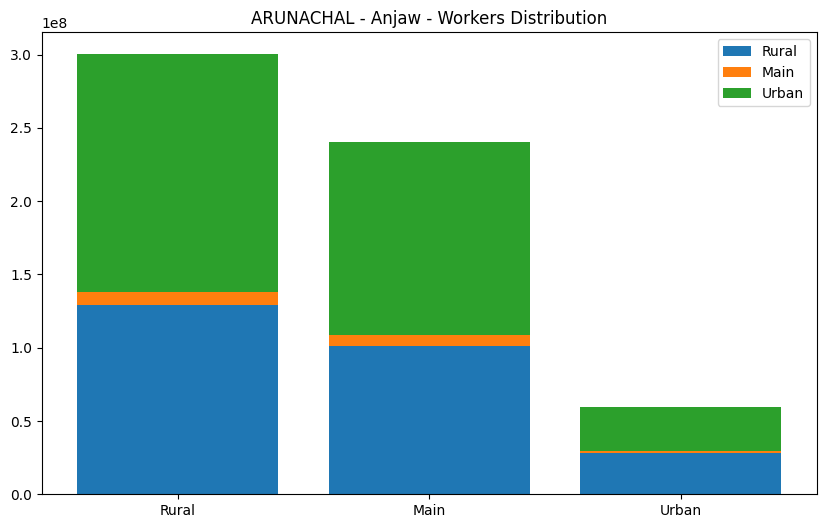

In [ ]:
# Plotting data for Rural, Main, and Urban workers
rural_cols = ['MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales']
urban_cols = ['MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales']

rural_data = data[rural_cols].sum().values
main_data = data[['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales']].iloc[0].values
urban_data = data[urban_cols].sum().values

# Plotting Rural, Main, and Urban data
fig, ax = plt.subplots(figsize=(10, 6))
x_labels = ['Rural', 'Main', 'Urban']
ax.bar(x_labels, rural_data, color='#1f77b4', label='Rural')
ax.bar(x_labels, main_data, bottom=rural_data, color='#ff7f0e', label='Main')
ax.bar(x_labels, urban_data, bottom=rural_data + main_data, color='#2ca02c', label='Urban')
ax.set_title(f"{selected_state} - {selected_district} - Workers Distribution")
ax.legend()
st.pyplot(fig)

In [ ]:
# Plotting data for Marginal workers (using pie chart)
marginal_cols_rural = ['MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales']
marginal_cols_urban = ['MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales']

marginal_data_rural = data[marginal_cols_rural].sum().values
marginal_data_urban = data[marginal_cols_urban].sum().values

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(marginal_data_rural, labels=marginal_cols_rural, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_title(f"{selected_state} - {selected_district} - Rural Marginal Workers Distribution")
st.pyplot(fig)

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(marginal_data_urban, labels=marginal_cols_urban, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_title(f"{selected_state} - {selected_district} - Urban Marginal Workers Distribution")
st.pyplot(fig)

DeltaGenerator()

In [98]:
pip install folium

In [99]:
import folium
from folium.plugins import MarkerCluster

In [107]:
# if SELECT == "Geo - Maps":

data = pd.read_csv("/content/final_HR.csv")

map_data = data[['latitude', 'longitude']]
# Create a Folium map centered around India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
# Add markers for each district
marker_cluster = MarkerCluster().add_to(india_map)
for index, row in map_data.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(marker_cluster)

# Display the map in Streamlit
#folium_static(india_map)

In [110]:
data = pd.read_csv("/content/final_HR.csv")

# import folium
# from folium.plugins import MarkerCluster
# import streamlit as st

# Get the data for the selected state and district
state_data = data[(data['State'] == selected_state)]
district_data = data[(data['District'] == selected_district)]

# Create a folium map centered at Delhi, India
folium_map = folium.Map(location=[28.6139, 77.2090], zoom_start=5)
# Create marker cluster for the points
marker_cluster = MarkerCluster().add_to(folium_map)

# Plot main workers for the selected state
for idx, row in state_data.iterrows():
    lat, lon = row['latitude'], row['longitude']
    total_workers = row['MainWorkersTotalPersons']
    male_female_ratio = row['MaleFemaleRatio']
    popup_text = f"State: {selected_state}<br>District: {selected_district}<br>Total Workers: {total_workers}<br>Male-Female Ratio: {male_female_ratio}"
    folium.Marker([lat, lon], popup=popup_text).add_to(marker_cluster)

# Plot main workers for the selected district
for idx, row in district_data.iterrows():
    lat, lon = row['latitude'], row['longitude']
    total_workers = row['MainWorkersTotalPersons']
    male_female_ratio = row['MaleFemaleRatio']
    popup_text = f"State: {selected_state}<br>District: {selected_district}<br>Total Workers: {total_workers}<br>Male-Female Ratio: {male_female_ratio}"
    folium.Marker([lat, lon], popup=popup_text).add_to(marker_cluster)

# Display the map using Streamlit
st.components.v1.html(folium_map._repr_html_(), width=700, height=500)


DeltaGenerator()

In [111]:
print(data.columns)

Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation',
       'WorkersRatio', 'latitude', 'longitude', 'NICName_str',
       'sentiment_score'],
      dtype='object')


In [112]:
print(states_data)

{'Rajasthan': ['Jalor', 'Sirohi', 'Banswara', 'Ganganagar', 'Ajmer', 'Pali', 'Bikaner', 'Tonk', 'Sikar', 'Kota', 'Jhunjhunun', 'Dhaulpur', 'Rajsamand', 'Bhilwara', 'Alwar', 'Chittaurgarh', 'Bundi', 'Hanumangarh', 'Nagaur', 'Udaipur', 'Jhalawar', 'SawaiMadhopur', 'Baran', 'Jaipur', 'Bharatpur', 'Barmer', 'Karauli', 'Churu', 'Dausa', 'Jaisalmer', 'Dungarpur', 'Jodhpur'], 'Odisha': ['Rayagada', 'Jajapur', 'Anugul', 'Sambalpur', 'Dhenkanal', 'Kalahandi', 'Nuapada', 'Khordha', 'Debagarh', 'Sundargarh', 'Koraput', 'Kandhamal', 'Kendujhar', 'Mayurbhanj', 'Kendrapara', 'Malkangiri', 'Jagatsinghapur', 'Puri', 'Cuttack', 'Bargarh', 'Bhadrak', 'Nayagarh', 'Gajapati', 'Baudh', 'Jharsuguda', 'Ganjam', 'Baleshwar', 'Nabarangapur', 'Balangir', 'Subarnapur'], 'Assam': ['Chirang', 'Nalbari', 'Nagaon', 'Sonitpur', 'Goalpara', 'Udalguri', 'Darrang', 'Kamrup', 'Dhubri', 'Dhemaji', 'DimaHasao', 'Baksa', 'KarbiAnglong', 'Sivasagar', 'Kokrajhar', 'Tinsukia', 'Golaghat', 'Cachar', 'Dibrugarh', 'KamrupMetropol

In [113]:
# Define selected_state
unique_states = sorted(data['State'].unique())
selected_state = st.sidebar.selectbox("Select State", unique_states, key="state_selector")

# Filter districts based on the selected state
filtered_districts = sorted(data[data['State'] == selected_state]['District'].unique())
selected_district = st.sidebar.selectbox("Select District", filtered_districts, key="district_selector")

# Filter data based on user selections
state_data = data[(data['State'] == selected_state)]
district_data = data[(data['District'] == selected_district)]

# Display the filtered data for the selected state and district
st.write(f"Showing data for {selected_state} - {selected_district}")

# Total number of state workers
total_state_workers = state_data['MainWorkersTotalPersons'].sum()
st.write(f"Total number of state workers: {total_state_workers}")

# Total number of district workers
total_district_workers = district_data['MainWorkersTotalPersons'].sum()
st.write(f"Total number of district workers: {total_district_workers}")

# Data summary
st.subheader("Data Summary")
st.write(data.describe())

In [114]:
import plotly.express as px

# Filter data for Main, Rural, and Urban workers
main_cols = ['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales']
rural_cols = ['MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales']
urban_cols = ['MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales']

main_data = data.groupby('State')[main_cols].sum().reset_index()
rural_data = data.groupby('State')[rural_cols].sum().reset_index()
urban_data = data.groupby('State')[urban_cols].sum().reset_index()

# Plotting the differences in counts
fig = px.bar(main_data, x='State', y='MainWorkersTotalPersons',
             title='Differences in Main, Rural, and Urban Workers Counts (State-wise)',
             labels={'MainWorkersTotalPersons': 'Total Workers Count'},
             color_discrete_sequence=['#1f77b4'],
             template='plotly_white')

fig.add_bar(x=main_data['State'], y=main_data['MainWorkersTotalPersons'],
            name='Main Workers', marker=dict(color='#1f77b4'))

fig.add_bar(x=rural_data['State'], y=rural_data['MainWorkersRuralPersons'],
            name='Rural Workers', marker=dict(color='#ff7f0e'))

fig.add_bar(x=urban_data['State'], y=urban_data['MainWorkersUrbanPersons'],
            name='Urban Workers', marker=dict(color='#2ca02c'))

# Update the layout for better visualization
fig.update_layout(barmode='stack', xaxis_title='State', yaxis_title='Total Workers Count', showlegend=True)

# Display the chart
st.plotly_chart(fig)

DeltaGenerator()

In [115]:
import plotly.express as px

# Filter data for Main, Rural, and Urban workers
main_cols = ['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales']
rural_cols = ['MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales']
urban_cols = ['MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales']

main_data = data.groupby('State')[main_cols].sum().reset_index()
rural_data = data.groupby('State')[rural_cols].sum().reset_index()
urban_data = data.groupby('State')[urban_cols].sum().reset_index()

# Plotting the differences in counts
fig = px.bar(main_data, x='State', y='MainWorkersTotalPersons',
             title='Differences in Main, Rural, and Urban Workers Counts (State-wise)',
             labels={'MainWorkersTotalPersons': 'Total Workers Count'},
             color_discrete_sequence=['#1f77b4'],
             template='plotly_white')

fig.add_bar(x=main_data['State'], y=main_data['MainWorkersTotalPersons'],
            name='Main Workers', marker=dict(color='#1f77b4'))

fig.add_bar(x=rural_data['State'], y=rural_data['MainWorkersRuralPersons'],
            name='Rural Workers', marker=dict(color='#ff7f0e'))

fig.add_bar(x=urban_data['State'], y=urban_data['MainWorkersUrbanPersons'],
            name='Urban Workers', marker=dict(color='#2ca02c'))

# Update the layout for better visualization
fig.update_layout(barmode='stack', xaxis_title='State', yaxis_title='Total Workers Count (Log Scale)',
                  showlegend=True, yaxis_type="log")

# Display the chart
st.plotly_chart(fig)


DeltaGenerator()

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.005s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


   ╭────────────────────────────────────────────────────────────────╮
   │                                                                │
   │      New major version of npm available! 6.14.8 → 10.5.0       │
   │   Changelog: https://github.com/npm/cli/releases/tag/v10.5.0   │
   │               Run npm install -g npm to update!                │
   │ 

In [121]:
%%writefile hrm.py
import streamlit as st
import pandas as pd
import numpy as np
from PIL import Image
import plotly.express as px
import folium
import numpy as np
from folium.plugins import MarkerCluster
from streamlit_option_menu import option_menu
import plotly.express as px
import matplotlib.pyplot as plt

def setting_bg():
    st.markdown(f""" <style>.stApp {{
                            background: url("https://cdn.dribbble.com/users/1770290/screenshots/6183149/bg_79.gif");
                            background-size: cover}}
                         </style>""", unsafe_allow_html=True)

#set st addbar page
icon = Image.open("/content/icon2.webp")

st.set_page_config(page_title= "HRM", page_icon= icon, layout= "wide", initial_sidebar_state= "expanded",
                   menu_items={'About': """# This page is created by Logeshwaran!"""})
st.markdown("<h1 style='text-align: center; color: white; border: 2px solid yellow; padding: 10px; font-weight: bold;'>Industrial Human Resource Geo-Visualization</h1>", unsafe_allow_html=True)
setting_bg()

data = pd.read_csv("/content/final_HR.csv")
unique_states = sorted(data['State'].unique())
selected_state = st.sidebar.selectbox("Select State", unique_states, key="state_selector_unique")

filtered_districts = sorted(data[data['State'] == selected_state]['District'].unique())
selected_district = st.sidebar.selectbox("Select District", filtered_districts, key="district_selector_unique")

state_data = data[(data['State'] == selected_state)]
district_data = data[(data['District'] == selected_district)]

st.write(f"<div style='text-align: center; font-size: 24px;'>Showing data for {selected_state} - {selected_district}</div>", unsafe_allow_html=True)

total_state_workers = state_data['MainWorkersTotalPersons'].sum()
total_district_workers = district_data['MainWorkersTotalPersons'].sum()

# Set the font size and center the text for total state workers
st.write(f"<div style='text-align: center; font-size: 24px;'>Total number of state workers: {total_state_workers}</div>", unsafe_allow_html=True)

# Set the font size and center the text for total district workers
st.write(f"<div style='text-align: center; font-size: 24px;'>Total number of district workers: {total_district_workers}</div>", unsafe_allow_html=True)
st.subheader("Data Summary")
st.write(data.describe())

state_summary = state_data[[
    'MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales',
    'MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales',
    'MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
    'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
    'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
    'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales',
    'TotalPopulation'
]].sum().sort_values()

st.subheader("State-wise Summary")
fig = px.bar(
    x=state_summary.index,
    y=state_summary.values,
    color=state_summary.index,
    labels={'y': 'Count', 'x': 'Worker Cat'},
    title=f"{selected_state} - Workers Summary",
)
fig.update_layout(barmode='stack')

st.plotly_chart(fig)

data = pd.read_csv("/content/final_HR.csv")


filtered_nic_names = data[data['District'] == selected_district]['NICName'].unique()
filtered_nic_names = [nic.replace('[', '').replace(']', '').replace("'", "") for nic in filtered_nic_names]
filtered_nic_names = [nic.capitalize() for nic in filtered_nic_names]
filtered_nic_names = sorted(filtered_nic_names)

selected_nic_name = st.sidebar.selectbox("Select NIC Name", filtered_nic_names, key="nic_name_selector")

# Plotting data for Rural, Main, and Urban workers
rural_cols = ['MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales']
urban_cols = ['MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales']

rural_data = data[rural_cols].sum().values
main_data = data[['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales']].iloc[0].values
urban_data = data[urban_cols].sum().values

fig, ax = plt.subplots(figsize=(10, 6))
x_labels = ['Rural', 'Main', 'Urban']
ax.bar(x_labels, rural_data, color='#1f77b4', label='Rural')
ax.bar(x_labels, main_data, bottom=rural_data, color='#ff7f0e', label='Main')
ax.bar(x_labels, urban_data, bottom=rural_data + main_data, color='#2ca02c', label='Urban')
ax.set_title(f"{selected_state} - {selected_district} - Workers Distribution")
ax.legend()
st.pyplot(fig)


# Plotting data for Marginal workers (using pie chart)
marginal_cols_rural = ['MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales']
marginal_cols_urban = ['MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales']

marginal_data_rural = data[marginal_cols_rural].sum().values
marginal_data_urban = data[marginal_cols_urban].sum().values

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(marginal_data_rural, labels=marginal_cols_rural, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_title(f"{selected_state} - {selected_district} - Rural Marginal Workers Distribution")
st.pyplot(fig)

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(marginal_data_urban, labels=marginal_cols_urban, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_title(f"{selected_state} - {selected_district} - Urban Marginal Workers Distribution")
st.pyplot(fig)




main_cols = ['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales']
rural_cols = ['MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales']
urban_cols = ['MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales']

main_data = data[['State'] + main_cols].groupby('State').sum().reset_index()
rural_data = data[['State'] + rural_cols].groupby('State').sum().reset_index()
urban_data = data[['State'] + urban_cols].groupby('State').sum().reset_index()

main_data_melted = main_data.melt(id_vars='State', var_name='WorkerType', value_name='Count')


fig = px.bar(main_data_melted, x='State', y='Count', color='WorkerType',
             title='Differences in State-wise',
             labels={'Count': 'Total Workers Count'},
             color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c'],
             template='plotly_white')

fig.update_layout(barmode='group', xaxis_title='State', yaxis_title='Total Workers Count (Log Scale)',
                  showlegend=True, yaxis_type="log")

st.plotly_chart(fig)



# Geo-Map Visualization
data = pd.read_csv("/content/final_HR.csv")

state_data = data[(data['State'] == selected_state)]
district_data = data[(data['District'] == selected_district)]

folium_map = folium.Map(location=[28.6139, 77.2090], zoom_start=5)

marker_cluster = MarkerCluster().add_to(folium_map)

for idx, row in state_data.iterrows():
    lat, lon = row['latitude'], row['longitude']
    total_workers = row['MainWorkersTotalPersons']
    male_female_ratio = row['MaleFemaleRatio']
    popup_text = f"State: {selected_state}<br>District: {selected_district}<br>Total Workers: {total_workers}<br>Male-Female Ratio: {male_female_ratio}"
    folium.Marker([lat, lon], popup=popup_text).add_to(marker_cluster)

for idx, row in district_data.iterrows():
    lat, lon = row['latitude'], row['longitude']
    total_workers = row['MainWorkersTotalPersons']
    male_female_ratio = row['MaleFemaleRatio']
    popup_text = f"State: {selected_state}<br>District: {selected_district}<br>Total Workers: {total_workers}<br>Male-Female Ratio: {male_female_ratio}"
    folium.Marker([lat, lon], popup=popup_text).add_to(marker_cluster)

st.components.v1.html(folium_map._repr_html_(), width=1200, height=500)

Overwriting hrm.py


In [ ]:
!pip install streamlit-option-menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 822.1/822.1 kB 9.1 MB/s eta 0:00:00


In [119]:
!wget -q -O - ipv4.icanhazip.com

34.106.202.181


In [122]:
!streamlit run hrm.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.202.181:8501

npx: installed 22 in 2.282s
your url is: https://bright-cases-do.loca.lt
  Stopping...
^C
